In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [14]:
data=pd.read_csv("Netflix.csv")
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2002-05-23,1.156429,1.242857,1.145714,1.196429,1.196429,104790000
1,2002-05-24,1.214286,1.225000,1.197143,1.210000,1.210000,11104800
2,2002-05-28,1.213571,1.232143,1.157143,1.157143,1.157143,6609400
3,2002-05-29,1.164286,1.164286,1.085714,1.103571,1.103571,6757800
4,2002-05-30,1.107857,1.107857,1.071429,1.071429,1.071429,10154200
...,...,...,...,...,...,...,...
4869,2021-09-24,592.500000,592.979980,583.640015,592.390015,592.390015,2124800
4870,2021-09-27,587.950012,593.580017,576.929993,592.640015,592.640015,2504700
4871,2021-09-28,589.000000,599.539978,580.159973,583.849976,583.849976,4431100
4872,2021-09-29,589.010010,609.880005,588.010010,599.059998,599.059998,6221000


In [15]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,4874.000000,4874.000000,4874.000000,4874.000000,4874.000000,4.874000e+03
mean,104.644811,106.243736,103.006660,104.686524,104.686524,1.681687e+07
std,155.886656,158.173217,153.546958,155.940368,155.940368,1.937625e+07
min,0.377857,0.410714,0.346429,0.372857,0.372857,2.856000e+05
25%,3.901429,3.977143,3.835357,3.905714,3.905714,6.301225e+06
50%,21.386429,21.816429,20.935714,21.233572,21.233572,1.084630e+07
75%,125.445000,126.592499,122.987499,125.097502,125.097502,2.016192e+07
max,608.049988,619.000000,608.049988,610.340027,610.340027,3.234140e+08


In [16]:
sns.set(rc={"figure.figsize":(10,5)})

In [18]:
data["Date"]=pd.to_datetime(data["Date"])
data=data.set_index("Date")
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2002-05-23,1.156429,1.242857,1.145714,1.196429,1.196429,104790000
2002-05-24,1.214286,1.225000,1.197143,1.210000,1.210000,11104800
2002-05-28,1.213571,1.232143,1.157143,1.157143,1.157143,6609400
2002-05-29,1.164286,1.164286,1.085714,1.103571,1.103571,6757800
2002-05-30,1.107857,1.107857,1.071429,1.071429,1.071429,10154200
...,...,...,...,...,...,...
2021-09-24,592.500000,592.979980,583.640015,592.390015,592.390015,2124800
2021-09-27,587.950012,593.580017,576.929993,592.640015,592.640015,2504700
2021-09-28,589.000000,599.539978,580.159973,583.849976,583.849976,4431100


* Volume Of Stock Vs Time

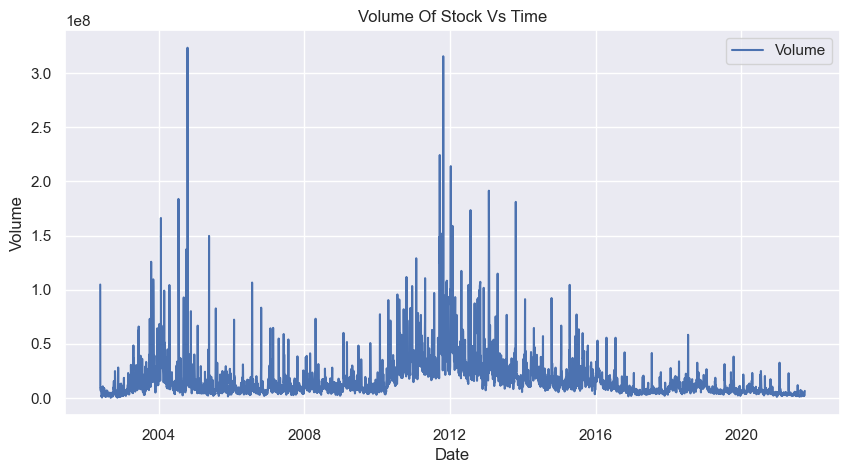

In [20]:
sns.lineplot(x=data.index,y=data["Volume"],label="Volume")
plt.title("Volume Of Stock Vs Time")
plt.show()

* Netflix Stock Price

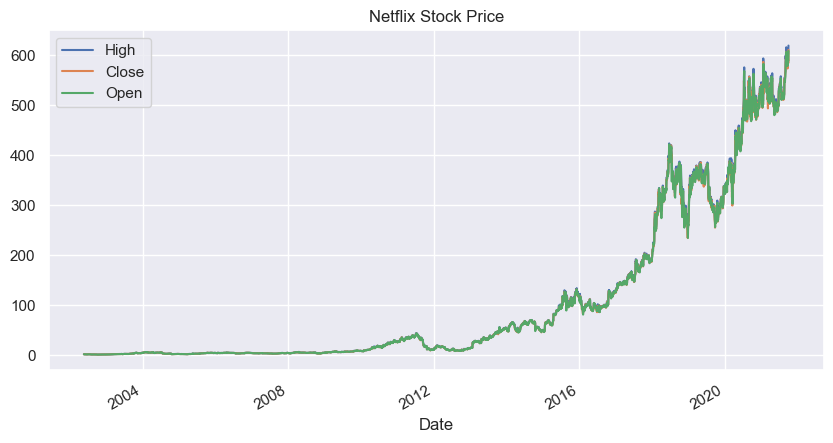

In [30]:
data.plot(y=["High","Close","Open"],title="Netflix Stock Price")
plt.show()

* Netflix Stock Price - Day, Month, year Wise

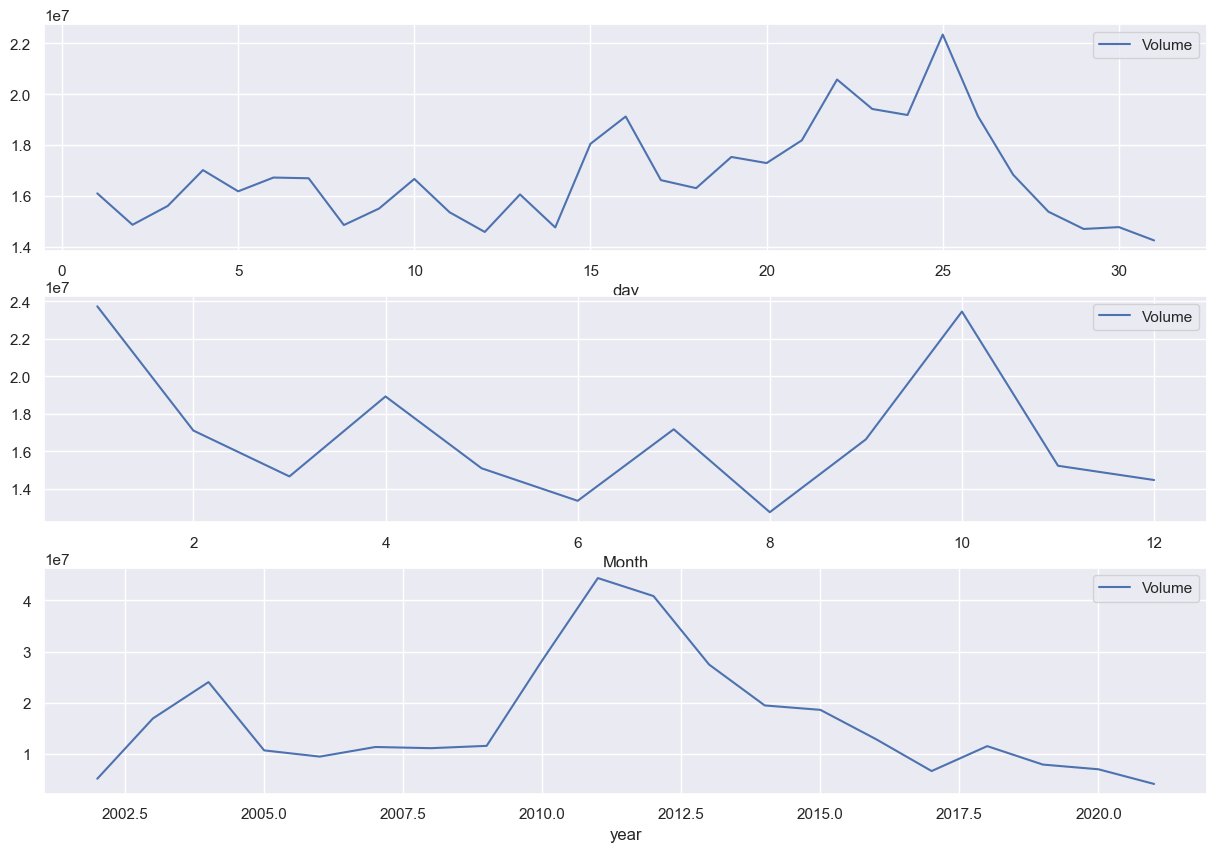

In [35]:
fig,(ax1,ax2,ax3)=plt.subplots(3,figsize=(15,10))
data.groupby(data.index.day).mean().plot(y="Volume",ax=ax1,xlabel="day")
data.groupby(data.index.month).mean().plot(y="Volume",ax=ax2,xlabel="Month")
data.groupby(data.index.year).mean().plot(y="Volume",ax=ax3,xlabel="year")
plt.show()

* Dates With Highest Stock Price

In [42]:
a=data.sort_values(by="High",ascending=False).head(5)
a["High"]

Date
2021-09-30    619.000000
2021-09-08    615.599976
2021-09-07    613.849976
2021-09-29    609.880005
2021-09-10    609.450012
Name: High, dtype: float64

* Dates With Lowest Stock Price

In [46]:
b=data.sort_values(by="Low",ascending=True).head(5)
b["Low"]

Date
2002-10-10    0.346429
2002-10-09    0.347143
2002-10-07    0.382143
2002-10-08    0.390714
2002-10-16    0.442857
Name: Low, dtype: float64

* High And Low Value Stock Per Period Of Time

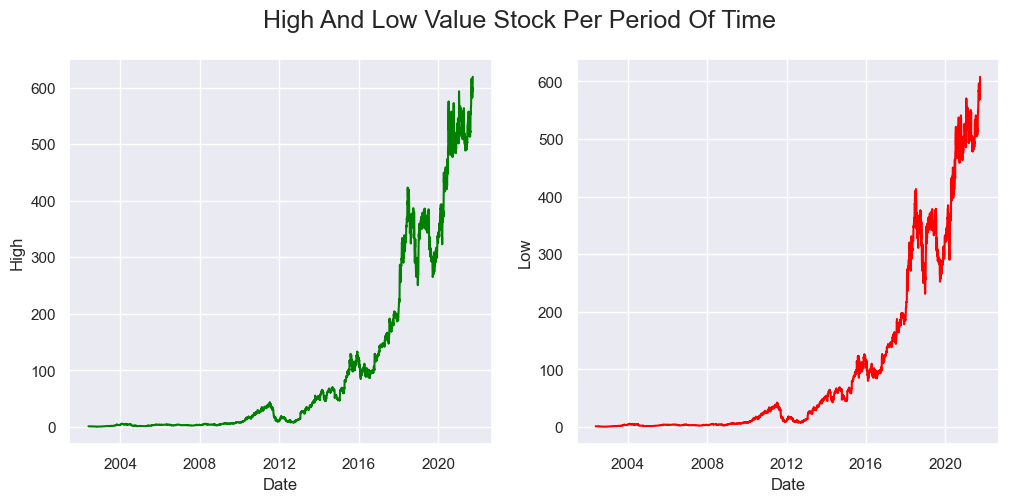

In [51]:
fig,axes=plt.subplots(nrows=1,ncols=2,sharex=True,figsize=(12,5))
fig.suptitle("High And Low Value Stock Per Period Of Time",fontsize=18)
sns.lineplot(ax=axes[0],y=data["High"],x=data.index,color="Green")
sns.lineplot(ax=axes[1],y=data["Low"],x=data.index,color="red")
plt.show()